# <center> Визуализация на Python
## <center>Часть 1. Matplotlib


В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

Для начала построим примитивную линейную диаграмму при помощи функции `plot`

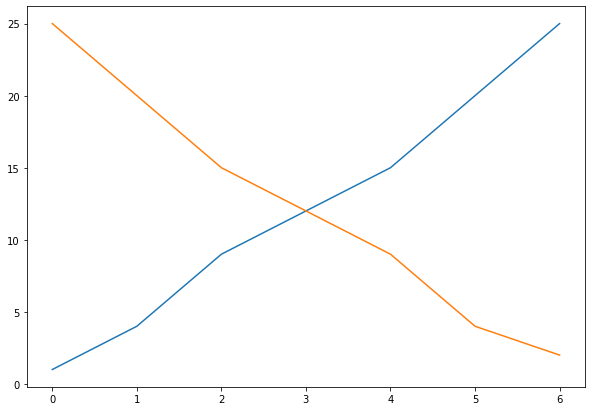

In [3]:
plt.plot([1, 4, 9, 12, 15, 20, 25])
plt.plot([25, 20, 15, 12, 9, 4, 2])

Потренируемся строить графики с библиотекой `matplotlib` на основе данных [об именах новорожденных в США](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data). Построим **столбчатую диаграмму распределения 15 самых популярных женских имен в 2017 году**.

In [5]:
names = pd.read_csv(
    'names/yob2017.txt',
    names=['Name', 'Gender', 'Count'])
# names
names_barh = names[names['Gender']=='F'].sort_values('Count', ascending=False).head(15)
names_barh

,Name,Gender,Count
0,Emma,F,19738
1,Olivia,F,18632
2,Ava,F,15902
3,Isabella,F,15100
4,Sophia,F,14831
5,Mia,F,13437
6,Charlotte,F,12893
7,Amelia,F,11800
8,Evelyn,F,10675
9,Abigail,F,10551


<BarContainer object of 15 artists>

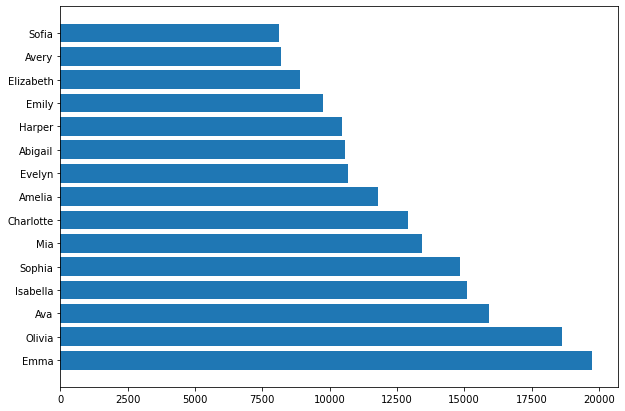

In [5]:
plt.barh(names_barh['Name'], names_barh['Count'])
# plt.savefig('my_diag_2.png')

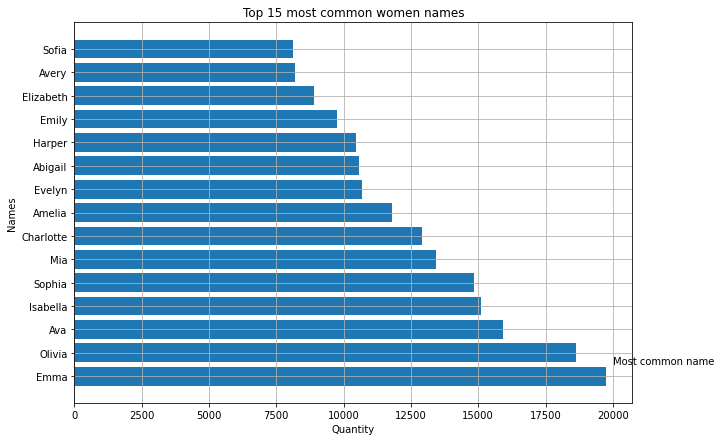

In [11]:
plt.barh(names_barh['Name'], names_barh['Count'])
plt.xlabel('Quantity')
plt.ylabel('Names')
plt.title('Top 15 most common women names')
plt.text(20000, 0.5, 'Most common name')
plt.grid()

Построим **линейчатый график распределения количетсва имен в разрезе пола (количества рожденных мальчиков и девочек) c 1880 по 2017 год**

In [13]:
# Делаем ДФ из всех файлов
names_by_year = {}
for year in range(1880, 2018):
    names_by_year[year] = pd.read_csv(
        f'names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
...,...,...,...
2017,Zykai,M,5
2017,Zykeem,M,5
2017,Zylin,M,5
2017,Zylis,M,5


В библиотеку `pandas` встроен wrapper для `matplotlib`.
Начнем с самого простого и зачастую удобного способа визуализировать данные из `pandas dataframe` — это воспользоваться методом `plot.`

In [18]:
# Агрегируем количество имен по годам и по полу
gender_dynamics = names_all.groupby([names_all.index, 'Gender']).sum()
print(gender_dynamics)
# gender_dynamics
gender_dynamics.unstack('Gender').plot()

               Count
     Gender         
1880 F         90993
     M        110491
1881 F         91953
     M        100743
1882 F        107847
...              ...
2015 M       1909804
2016 F       1763916
     M       1889052
2017 F       1711811
     M       1834490

[276 rows x 1 columns]


Count         
Gender        F        M
1880      90993   110491
1881      91953   100743
1882     107847   113686
1883     112319   104627
1884     129020   114442
...         ...      ...
2013    1750321  1886989
2014    1781072  1915239
2015    1778883  1909804
2016    1763916  1889052
2017    1711811  1834490

[138 rows x 2 columns]

Построим **столбчатую диаграмму сравнение количества имен мальчиков и девочек в 1880 и 2017 годах**.

In [23]:
gender_dynamics = names_all.groupby([names_all.index, 'Gender']).sum()
gender_dynamics = gender_dynamics.loc[(gender_dynamics.index.get_level_values(0).isin([1880, 2017]))]
gender_dynamics

Count
     Gender         
1880 F         90993
     M        110491
2017 F       1711811
     M       1834490

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. 

<AxesSubplot:>

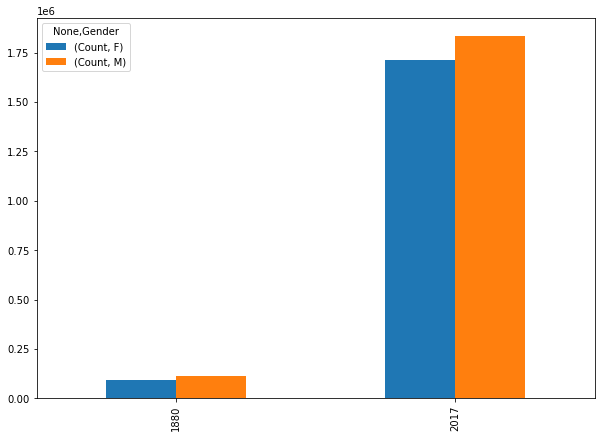

In [21]:
gender_dynamics.unstack().plot(kind='bar')

Построим **круговую диаграмму сравнения количества топ-5 имен по всем годам**

In [ ]:
name_dynamics = names_all.groupby(['Name']).sum().sort_values(by='Count', ascending=False).head(5)
# name_dynamics
name_dynamics.plot(kind='pie', y='Count')

Построим `boxplot` распределения длин имен в 2017 году. 

In [26]:
names = pd.read_csv(
    'names/yob2017.txt', 
    names=['Name','Gender','Count']
)
names['Length'] = names['Name'].map(len)
names
#names['Length'].plot(kind='box')

,Name,Gender,Count,Length
0,Emma,F,19738,4
1,Olivia,F,18632,6
2,Ava,F,15902,3
3,Isabella,F,15100,8
4,Sophia,F,14831,6
...,...,...,...,...
32464,Zykai,M,5,5
32465,Zykeem,M,5,6
32466,Zylin,M,5,5
32467,Zylis,M,5,5


`Box plot` состоит из коробки (поэтому он и называется `box plot`), усиков и точек. Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (`Q1`) и 75% (`Q3`) процентили. Черта внутри коробки обозначает медиану распределения. 
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, где `IQR = Q3 - Q1` - интерквантильный размах. Точками на графике обозначаются выбросы (`outliers`) - те значения, которые не вписываются в промежуток значений, заданный усами графика

Поработаем с данными о продажах и оценках видео-игр с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Данные об оценках игр есть не для всех строк, поэтому сразу оставим только те записи, по которым есть полные данные.

In [ ]:
df = pd.read_csv('video_games_sales.csv')
print(df.shape)

In [ ]:
df.info()

In [ ]:
df = df.dropna()
print(df.shape)

Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства оставим только те признаки, которые мы будем в дальнейшем использовать.

In [ ]:
df.head()

In [ ]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Построим **график продаж видео игр в различных странах в зависимости от года**. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам.

In [ ]:
[x for x in df.columns if 'Sales' in x]

In [ ]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]\
    .groupby('Year_of_Release').sum()
df1.head()

In [ ]:
df1.plot()

In [ ]:
# Параметр rot отвечает за угол наклона подписей к оси x.
df1.plot(kind='bar', rot=45)

Или можем сделать stacked bar chart, чтобы показать и динамику продаж и их разбиение по рынкам.

In [ ]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='bar', rot=45, stacked=True)

In [ ]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=False)

Еще один часто встречающийся тип графиков - это гистограммы. Посмотрим на **распределение оценок критиков**.

In [ ]:
df.Critic_Score.hist()

In [ ]:
ax = df.Critic_Score.hist()
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

У гистограмм можно контролировать, на сколько групп мы разбиваем распределение с помощью параметра `bins`.

In [ ]:
ax = df.Critic_Score.hist(bins=25)
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

Познакомимся с тем, как в pandas можно стилизовать таблицы.

In [ ]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

In [ ]:
top_developers_df.style.bar()

### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)
 * [Документация matplotlib](https://matplotlib.org/)

## <center>Часть 2. Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков **pair plot (scatter plot matrix)**. Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки. 

In [ ]:
import seaborn as sns

In [ ]:
sns_plot = sns.pairplot(
    df[['Global_Sales', 'Critic_Score', 'User_Score']])
sns_plot

Также с помощью `seaborn` можно построить распределение, для примера посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По default'у на графике отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

In [ ]:
sns.distplot(df.Critic_Score)

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и __`joint_plot`__ – это гибрид `scatter plot` и `histogram` (отображаются также гистограммы распределений признаков). Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter')

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='reg')

Давайте **сравним пользовательские оценки игр для топ-5 крупнейших игровых платформ** при помощи `boxplot`.

In [ ]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
top_platforms
ax = sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)])


И еще один тип графиков (последний из тех, которые мы рассмотрим в этой части) - это __`heat map`__. `Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

In [ ]:
ax = sns.heatmap(platform_genre_sales)


### Полезные ссылки
* [Tutorial](https://seaborn.pydata.org/tutorial.html)
* [Gallery](https://seaborn.pydata.org/examples/index.html)

## <center>Часть 3. Plotly

Мы рассмотрели визуализации на базе библиотеки `matplotlib`. Однако, это не единственная опция для построения графиков на языке `python`. Познакомимся также с библиотекой __`plotly`__. `Plotly` - это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код. 

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

Перед началом работы импортируем все необходимые модули и инициализируем `plotly` с помощью команды `init_notebook_mode`.

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим __`line plot` с динамикой числа вышедших игр и их продаж по годам__. 

In [ ]:
global_sales_years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum()
global_sales_years_df.head()

In [ ]:
released_years_df = df.groupby('Year_of_Release')[['Name']].count()
released_years_df.head()

In [ ]:
years_df = global_sales_years_df.join(released_years_df)
years_df.head()

In [ ]:
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df.head()

В `plotly` все строится на объекте `Figure`, который состоит из данных (массив линий, которые в библиотеке называются `traces`) и оформления/стиля, за который отвечает объект `layout`. В простых случаях можно вызывать функцию `iplot` и просто от массива `traces`.

In [ ]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)
  
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Посмотрим также на __рыночную долю игровых платформ, расчитанную по количеству выпущенных игр и по суммарной выручке__. Для этого построим __`bar chart`__.

In [ ]:
global_sales_platforms_df = df.groupby('Platform')[['Global_Sales']].sum()
released_platforms_df = df.groupby('Platform')[['Name']].count()
platforms_df = global_sales_platforms_df.join(released_platforms_df)
platforms_df

In [ ]:
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', inplace=True)
platforms_df = platforms_df.apply(lambda x: 100*x/platforms_df.sum(), axis = 1)
platforms_df.head()

In [ ]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales',
    orientation = 'v'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

В `plotly` можно построить и __`box plot`__. Рассмотрим __различия оценок критиков в зависимости от жанра игры__.

In [ ]:
df.Genre.unique()

In [ ]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, 
               name=genre)
    )
iplot(data, show_link = False)

Давайте посмотрим на график зависимости средней оценки пользователей и оценки критиков по жанрам. Это будет обычный scatter plot.

In [ ]:
scores_genres_df = df.groupby('Genre')[['Critic_Score', 'User_Score']].mean()
sales_genres_df = df.groupby('Genre')[['Global_Sales']].sum()

genres_df = scores_genres_df.join(sales_genres_df)
    
genres_df.head()

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres', 'yaxis': {'title': 'user score'}, 
          'xaxis': {'title': 'critic score'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Пока что ничего непонятно, давайте добавим к точкам подписи.

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Далее добавим на график еще одно измерение - размер жанра (суммарный объем продаж, который мы заранее посчитали) и получим bubble chart.

In [ ]:
genres_df.index

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom center',
    marker = dict(
        size = 1/10*genres_df.Global_Sales,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of video games genres',
    'xaxis': {'title': 'Critic Score'},
    'yaxis': {'title': 'User Score'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В plotly есть возможность делать графики в drop down menus, когда в зависимости от выбранного среза будут отображаться различные графики. Давайте построим __гистораммы распределений оценок пользователей по жанрам__.

In [ ]:
traces = []
for genre in ['Racing', 'Shooter', 'Sports', 'Action']:
    traces.append(
        go.Histogram(
            x=df[df.Genre == genre].User_Score,
            histnorm='probability', 
            name = genre, 
            visible = (genre == 'Racing'))
    )
    
layout = go.Layout(
    title='User Score Distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='Racing',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='Shooter',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='Sports',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True]],
                    label='Action',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

Немного отвлечемся от данных об играх и рассмотрим еще один тип графика, который можно построить в plotly и они могут быть очень полезны, например, для web-аналитики - это __воронка или funnel пользователя на сайте__.
В plotly на данный момент нет функции, которая умеет строить воронки из коробки, но с помощью svg фигур ее достаточно легко построить. Этот пример покажет нам, насколько легко можно кастомизировать библиотеку под свои нужды.

In [ ]:
# chart stages data
values = [40000, 17567, 7443, 3290, 2567]
phases = ['Main Page', 'Catalog', 'Product Details', 'Cart', 'Purchase']
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

In [ ]:
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

In [ ]:
# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(0,0,0)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(255,255,255,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False,
        range=[-450, 450]
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

### Обертки для plotly
Как вы могли заметить, описывать все traces бывает достаточно многословно. Поэтому для частых cases удобно написать функции-обертки на DataFrame. Рассмотрим сценарии с line plot и несколько line plots с drop down.

In [ ]:
def plotly_line_plot(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

df1.head()

In [ ]:
plotly_line_plot(
    df1,
    title = 'Sales of Video Games'
)

In [ ]:
def get_num_columns(dfs):
    if len(dfs) == 0:
        return 0
    return sum(list(map(lambda x: len(x.columns), dfs)))

def plotly_dropdown_line_plots(slices, title):
    slices_lst = list(slices.keys())
    N_slices = len(slices_lst)

    traces_dm = []
    buttons = []
    
    for i in range(N_slices):
        slice = slices_lst[i]
        df = slices[slice]
        
        dfs_before = list(slices.values())[:i]
        dfs_after = list(slices.values())[i+1:]

        num_before = get_num_columns(dfs_before)
        num_after = get_num_columns(dfs_after)
        
        for col in df.columns:
            traces_dm.append(
                go.Scatter(
                    x = df.index,
                    y = df[col],
                    name = col,
                    visible = (i == 0),
                    mode = 'lines'
                )
            )

        buttons.append(
            dict(
                label = slice,
                method = 'restyle',
                args = ['visible', [False]*num_before + [True]*len(df.columns) + [False]*num_after]
            )
        )
    layout = go.Layout(
        title = title,
        updatemenus = [
            dict(
                x = -0.05,
                y = 1,
                yanchor = 'top',
                buttons = buttons,
            )
        ]
    )
    fig = go.Figure(data=traces_dm, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
genre_slices = {}

In [ ]:
for genre in df.Genre.unique():
    genre_slices[genre] = df[df.Genre == genre]\
        .groupby('Year_of_Release')[list(filter(lambda x: 'Sales' in x, df.columns))].sum()

In [ ]:
genre_slices.keys()

In [ ]:
genre_slices['Action'].head()

In [ ]:
plotly_dropdown_line_plots(genre_slices, title = 'Sales of Video Games by genre')

### Полезные ссылки
* [Галерея](https://plot.ly/python/)
* [Документация](https://plot.ly/python/reference/)